In [1]:
import numpy as np
import pandas as pd
 
## visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
## load movies data
movies = pd.read_csv("data/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
## load user ratings data
user_ratings = pd.read_csv("data/ratings.csv")
user_ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# EDA

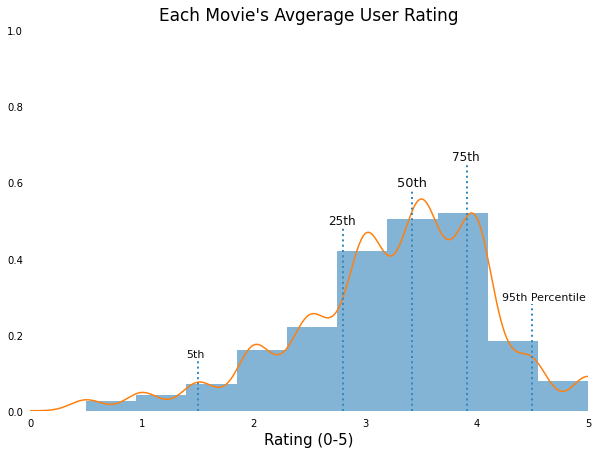

In [4]:
## What is each movie's average user rating?
## calculate each movie's average rating
avg_movie_rating = user_ratings.groupby("movieId").mean()["rating"]
avg_movie_rating

## Plot the distribution of each movies average rating
fig, ax = plt.subplots(figsize = (10,7))

# Plots #
    # Plot histogram
avg_movie_rating.plot(kind = "hist", density = True, alpha = 0.55, bins = 10) # change density to true, because KDE uses density
    # Plot KDE
avg_movie_rating.plot(kind = "kde")

# Style #
plt.style.use("bmh")

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = avg_movie_rating.quantile(0.05), avg_movie_rating.quantile(0.25), avg_movie_rating.quantile(0.5), avg_movie_rating.quantile(0.75), avg_movie_rating.quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 1, 0.13], [quant_25, 1, 0.48], [quant_50, 1, 0.58],  [quant_75, 1, 0.65], [quant_95, 1, 0.28]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
    
# Add labels
ax.text(quant_5-.1, 0.14, "5th", size = 11, alpha = 0.95)
ax.text(quant_25-.13, 0.49, "25th", size = 12, alpha = 0.95)
ax.text(quant_50-.13, 0.59, "50th", size = 13, alpha = 0.95)
ax.text(quant_75-.13, 0.66, "75th", size = 12, alpha = 0.95)
ax.text(quant_95-.27, 0.29, "95th Percentile", size = 11, alpha =.95)

# X #
ax.set_xlabel("Rating (0-5)", size=15)
    # Limit x range to 0-5 
ax.set_xlim(0, 5)

# Y #
ax.set_ylim(0,1)
    # Remove y ticks
# ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Overall #
ax.set_title("Each Movie's Avgerage User Rating", size = 17, pad = 10)
# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
    
# Later in the code
# ax.grid(False)
    
plt.show()


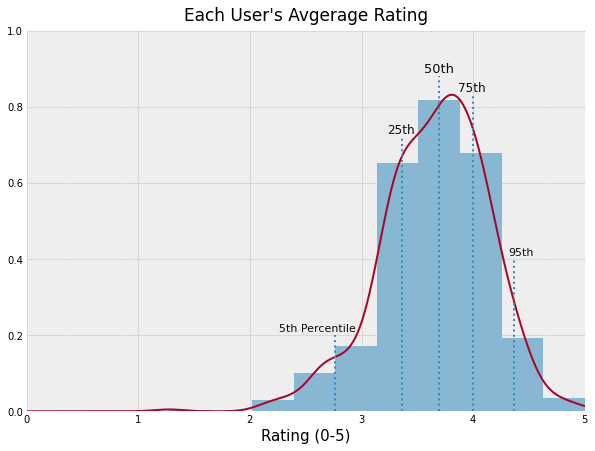

In [5]:
## What is each user's average rating?
## calculate each movie's average rating
avg_user_rating = user_ratings.groupby("userId").mean()["rating"]
avg_user_rating

## Plot the distribution of each movies average rating
fig, ax = plt.subplots(figsize = (10,7))

# Plots #
    # Plot histogram
avg_user_rating.plot(kind = "hist", density = True, alpha = 0.55, bins = 10) # change density to true, because KDE uses density
    # Plot KDE
avg_user_rating.plot(kind = "kde")

# Style #
plt.style.use("bmh")

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = avg_user_rating.quantile(0.05), avg_user_rating.quantile(0.25), avg_user_rating.quantile(0.5), avg_user_rating.quantile(0.75), avg_user_rating.quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 1, 0.20], [quant_25, 1, 0.72], [quant_50, 1, 0.88],  [quant_75, 1, 0.83], [quant_95, 1, 0.40]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
    
# Add labels
ax.text(quant_5-.5, 0.21, "5th Percentile", size = 11, alpha = 0.95)
ax.text(quant_25-.13, 0.73, "25th", size = 12, alpha = 0.95)
ax.text(quant_50-.13, 0.89, "50th", size = 13, alpha = 0.95)
ax.text(quant_75-.13, 0.84, "75th", size = 12, alpha = 0.95)
ax.text(quant_95-.05, 0.41, "95th", size = 11, alpha =.95)

# X #
ax.set_xlabel("Rating (0-5)", size=15)
    # Limit x range to 0-5 
ax.set_xlim(0, 5)

# Y #
ax.set_ylim(0,1)
    # Remove y ticks
# ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Overall #
ax.set_title("Each User's Avgerage Rating", size = 17, pad = 10)
# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
    
# Later in the code
# ax.grid(False)
    
plt.show()
